In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

gpg: keybox '/tmp/tmp1jdizsts/pubring.gpg' created
gpg: /tmp/tmp1jdizsts/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1
··········


In [1]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

plotnine 0.3.0 has requirement scipy>=1.0.0, but you'll have scipy 0.19.1 which is incompatible.
kaggle-cli 0.12.13 has requirement lxml<4.1,>=4.0.0, but you'll have lxml 4.2.1 which is incompatible.


In [2]:
print(torch.__version__)

0.3.0.post4


In [4]:
!pip install fastai

    100% |████████████████████████████████| 430kB 4.9MB/s 
    100% |████████████████████████████████| 1.3MB 7.0MB/s 
    100% |████████████████████████████████| 1.5MB 11.6MB/s 
    100% |████████████████████████████████| 112kB 19.2MB/s 
    100% |████████████████████████████████| 174kB 14.2MB/s 
    73% |███████████████████████▍        | 15.2MB 12.2MB/s eta 0:00:01

    100% |████████████████████████████████| 20.9MB 1.4MB/s 
    100% |████████████████████████████████| 3.4MB 12.0MB/s 
    100% |████████████████████████████████| 112kB 19.6MB/s 
    100% |████████████████████████████████| 51kB 17.7MB/s 
    100% |████████████████████████████████| 51kB 17.6MB/s 
    100% |████████████████████████████████| 2.2MB 7.8MB/s 


    100% |████████████████████████████████| 61kB 18.2MB/s 
    100% |████████████████████████████████| 4.2MB 10.9MB/s 
    100% |████████████████████████████████| 552kB 24.3MB/s 
    100% |████████████████████████████████| 13.7MB 1.4MB/s 
    100% |████████████████████████████████| 92kB 22.3MB/s 
    100% |████████████████████████████████| 5.7MB 8.5MB/s 
    100% |████████████████████████████████| 471kB 20.7MB/s 
    100% |████████████████████████████████| 860kB 20.8MB/s 
    100% |████████████████████████████████| 81kB 17.9MB/s 


    100% |████████████████████████████████| 71kB 18.5MB/s 
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 102kB 22.3MB/s 
    100% |████████████████████████████████| 61kB 19.0MB/s 
    100% |████████████████████████████████| 81kB 16.6MB/s 
  Running setup.py bdist_wheel for fastai ... - \ done
  Stored in directory: /content/.cache/pip/wheels/98/2b/88/fe4cfe5bfa9cfea91cdfd2fe205f88746bf103f7b2994dffba
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ |

 / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /content/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /content/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for kaggle-cli ... - done
  Stored in directory: /content/.cache/pip/wheels/d5/bb/10/c1dd1b08c7433c943cb55c46367ae3f891415e8a37300ff8a7
  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in directory: /content/.cache/pip/wheels/86/a9/6b/36b727a9ec687dac08bd3d0501cddd7b1a223943513eb04a03
  Running setup.py bdist_wheel for torchtext ... - \ done
  Stored in directory: /content/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204

In [3]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import cv2

In [0]:
from fastai.imports import *
import os

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *


In [0]:
import sys
sys.path.insert(0, 'drive/ASHOKA forms/')
sys.path.insert(0, 'drive/ASHOKA forms/mias_labeled/')
#sys.path.insert(0, 'drive/ASHOKA forms/mias_binary_labeled/')
PATH = 'drive/ASHOKA forms/mias_labeled/'
#PATH = 'drive/ASHOKA forms/mias_binary_labeled/'
sz=224

In [9]:
torch.cuda.is_available()

True

In [10]:
torch.backends.cudnn.enabled

True

In [11]:
os.listdir(PATH)

['train', 'valid', 'tmp', 'models']

In [12]:
os.listdir(f'{PATH}valid')

['normal', 'malign', 'benign']

In [13]:
files = os.listdir(f'{PATH}valid/malign')
files

['mdb231.pgm',
 'mdb111.pgm',
 'mdb170.pgm',
 'mdb141.pgm',
 'mdb181.pgm',
 'mdb158.pgm',
 'mdb171.pgm']

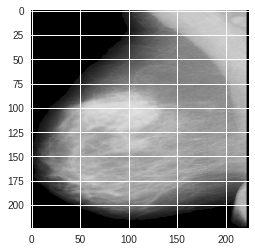

In [14]:
img = cv2.imread(f'{PATH}valid/malign/{files[1]}')
plt.imshow(img)

In [15]:
img.shape

(224, 224, 3)

In [0]:
aug1 = transforms_top_down = transforms_basic + [RandomDihedral()]
aug2 = transforms_side_on = transforms_basic + [RandomFlip()]

aug_types = [
    aug1,
    aug2,
]


aug_tfms = transforms_top_down = transforms_basic + [RandomDihedral()]
tfms = tfms_from_model(vgg16, sz, aug_tfms, max_zoom=1.1)     #=transforms_side_on

In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [26]:
arch = vgg16
data = ImageClassifierData.from_paths(PATH, tfms=tfms, num_workers=4)
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)
learn.fit(0.1, 10)




 33%|███▎      | 1/3 [00:01<00:02,  1.31s/it, loss=1.65]
                                                        [0.      1.64663 0.96944 0.63265]

 67%|██████▋   | 2/3 [00:00<00:00,  2.51it/s, loss=1.39]
                                                        [1.      1.38533 0.89129 0.63265]

 33%|███▎      | 1/3 [00:00<00:01,  1.37it/s, loss=1.27]
                                                        [2.      1.2686  0.93732 0.63265]

 67%|██████▋   | 2/3 [00:00<00:00,  2.61it/s, loss=1.14]
                                                        [3.      1.13796 1.11423 0.63265]

 33%|███▎      | 1/3 [00:00<00:01,  1.34it/s, loss=1.03]
                                                        [4.      1.03252 1.29287 0.55102]

  0%|          | 0/3 [00:00<?, ?it/s]


 33%|███▎      | 1/3 [00:00<00:01,  1.32it/s, loss=0.997]
                                                         [5.      0.99718 1.32066 0.57143]

 67%|██████▋   | 2/3 [00:00<00:00,  2.57it/s, loss=0.922]
                                                         [6.      0.92173 1.31054 0.57143]

 33%|███▎      | 1/3 [00:00<00:01,  1.29it/s, loss=0.87] 
                                                        [7.      0.86976 1.45519 0.57143]

 33%|███▎      | 1/3 [00:00<00:01,  1.33it/s, loss=0.816]
                                                         [8.      0.81629 1.69428 0.61225]

 33%|███▎      | 1/3 [00:00<00:01,  1.32it/s, loss=0.761]
                                                         [9.      0.76098 1.7473  0.57143]


In [27]:
lrf=learn.lr_find()


 33%|███▎      | 1/3 [00:00<00:01,  1.19it/s, loss=0.392]
                                                         [0.      0.39213 1.74045 0.55102]


In [0]:
y = data.val_y

In [29]:
log_preds = learn.predict()
print(log_preds.shape)

(49, 3)


In [30]:
log_preds = learn.predict()
log_preds.shape

(49, 3)

In [31]:
log_preds[:10]

array([[-3.525  , -4.16541, -0.04602],
       [-3.98819, -7.02846, -0.01961],
       [-3.55795, -3.91731, -0.0496 ],
       [-8.26172, -7.72477, -0.0007 ],
       [-0.53196, -4.76655, -0.90625],
       [-3.3247 , -4.0473 , -0.05493],
       [-2.37947, -3.01961, -0.15248],
       [-1.6952 , -4.29799, -0.2196 ],
       [-6.54385, -5.06221, -0.0078 ],
       [-2.4854 , -3.13496, -0.13558]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  
probs = np.exp(log_preds[:,1])        


In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return cv2.imread(PATH+ds.fnames[idx])

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


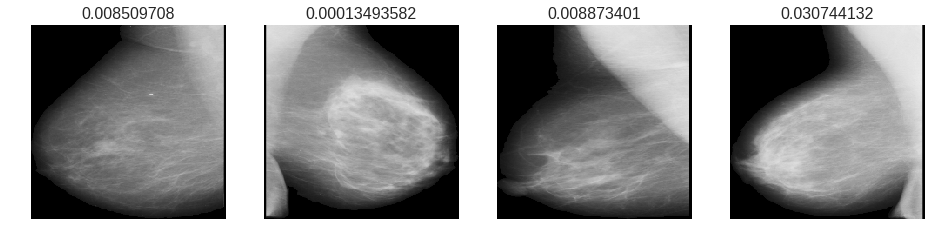

In [37]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


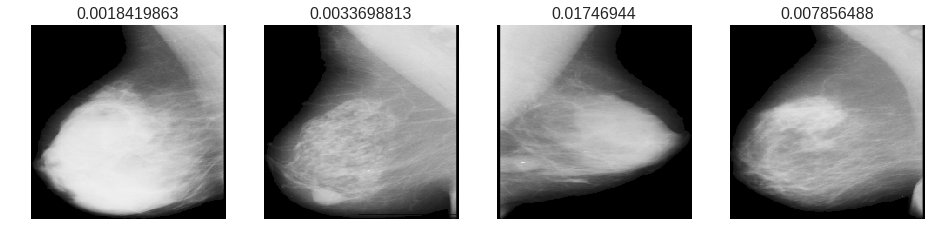

In [38]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct malignant mammograms


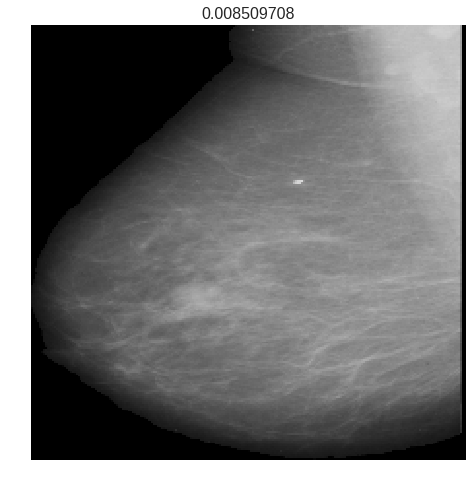

In [40]:
plot_val_with_title(most_by_correct(0, True), "Most correct malignant mammograms")

In [41]:
plot_val_with_title(most_by_correct(1, True), "Most correct benign mammograms")

Most correct benign mammograms


Most incorrect malignant mammograms


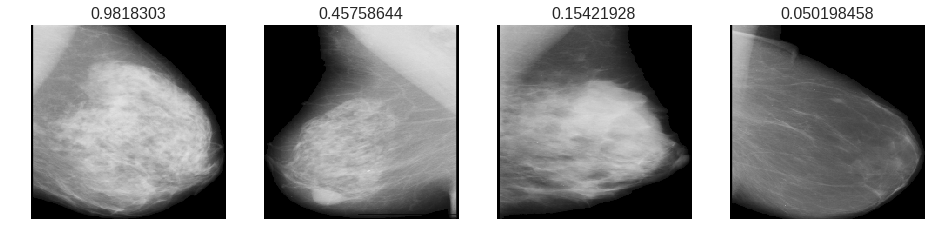

In [194]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect malignant mammograms")

Most incorrect benign mammograms


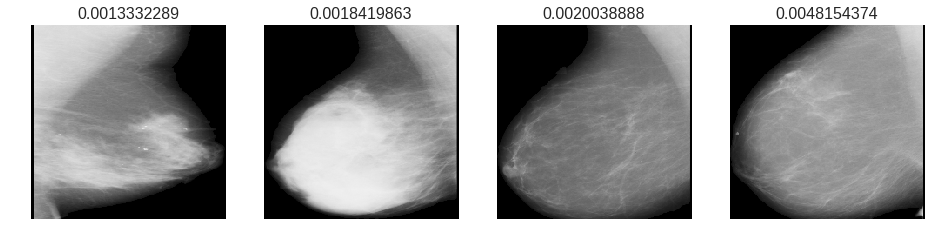

In [43]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect benign mammograms")

Most uncertain predictions


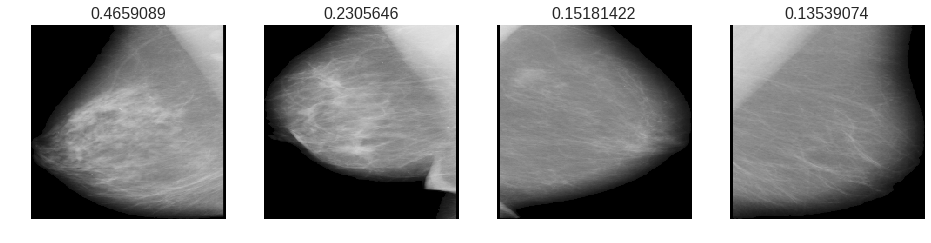

In [44]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

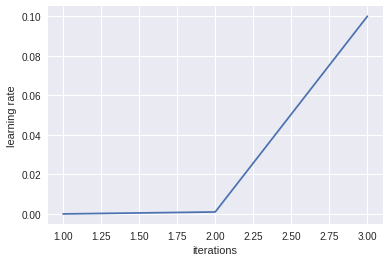

In [45]:
learn.sched.plot_lr()

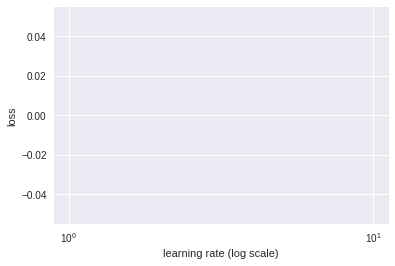

In [48]:
learn.sched.plot()

In [0]:
#ims = np.stack([get_augs() for i in range(2)])

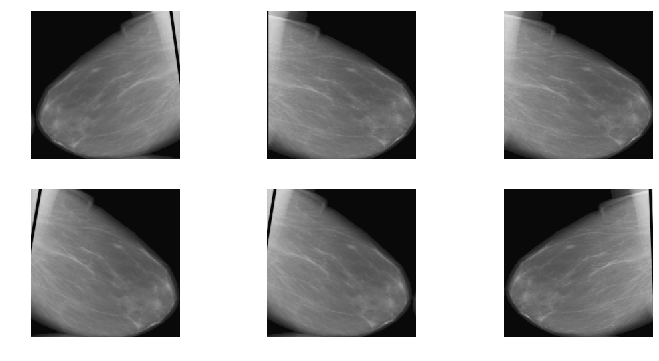

In [74]:
plots(ims, rows=2)

In [49]:
#I ADDED, MAYBE TRASH
batches = vgg19.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg19.get_batches(path+'valid', batch_size=batch_size)

AttributeError: ignored

In [0]:
#I ADDED, MAYBE TRASH
vgg.finetune(batches)


In [0]:
preds = np.argmax(log_preds , axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[ 1  0 10]
 [ 0  0  7]
 [ 3  1 27]]


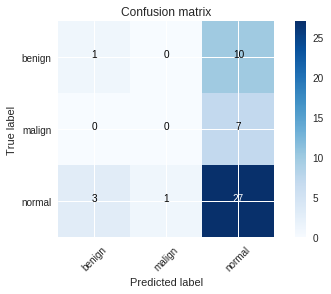

In [54]:
plot_confusion_matrix(cm, data.classes)

In [56]:
sum(np.diag(cm)) / 49   #Calculating acc

0.5714285714285714